## Daily Challenge: W4_D5

### Pokemon Win Prediction Analysis

### 1. Data Preparation

##### Import Libraries and Load Data

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [197]:
# Load datasets
pokemon_df = pd.read_csv('pokemon.csv')
combats_df = pd.read_csv('combats.csv')

In [198]:
# Display the first rows to verify loading
print(pokemon_df.head())
print(combats_df.head())

   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
2  3       Venusaur  Grass  Poison  80      82       83      100      100   
3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
4  5     Charmander   Fire     NaN  39      52       43       60       50   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  
3     80           1      False  
4     65           1      False  
   First_pokemon  Second_pokemon  Winner
0            266             298     298
1            702             701     701
2            191             668     668
3            237             683     683
4            151             231     151


##### Fix Missing Name for Pokemon #62

In [199]:
# Fix missing Name for Pokemon #62
pokemon_df.loc[pokemon_df['#'] == 62, 'Name'] = 'Primeape'

# Verify that the name was fixed
print(pokemon_df[pokemon_df['#'] == 62])

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
61  62  Primeape  Fighting    NaN  40      80       35       35       45   

    Speed  Generation  Legendary  
61     70           1      False  


##### Fill Missing Values in Type 2

In [200]:
# Fill missing Type 2 values with 'None'
pokemon_df['Type 2'] = pokemon_df['Type 2'].fillna('None')

# Check if there are still missing Type 2 values
print(pokemon_df['Type 2'].isna().sum())

0


##### Count Total Battles per Pokemon

In [201]:
# Concatenate First_pokemon and Second_pokemon columns to count total battles
total_battles = pd.concat([
    combats_df['First_pokemon'],
    combats_df['Second_pokemon']
])

# Count the total number of battles per Pokemon
battle_counts = total_battles.value_counts().rename('Total_Battles')

# Display the first counts to verify
print(battle_counts.head())

163    164
344    160
667    159
758    158
214    158
Name: Total_Battles, dtype: int64


##### Count Wins per Pokemon

In [202]:
# Count the number of wins per Pokemon
win_counts = combats_df['Winner'].value_counts().rename('Wins')

# Display the first counts to verify
print(win_counts.head())

Winner
163    152
154    136
438    136
428    134
432    133
Name: Wins, dtype: int64


##### Compute Win Percentage and Merge Data

In [203]:
# Create DataFrame to combine total battles and wins
win_stats = pd.DataFrame({'Total_Battles': battle_counts, 'Wins': win_counts})

# Fill NaN values with 0 (Pokemons that never won)
win_stats = win_stats.fillna(0)

# Calculate win percentage
win_stats['Win_Percentage'] = (win_stats['Wins'] / win_stats['Total_Battles']) * 100

# Merge win stats with the main pokemon_df
pokemon_df = pokemon_df.merge(
    win_stats,
    left_on='#',
    right_index=True,
    how='left'
)

# Fill missing battle stats with 0 (Pokemons that never fought)
pokemon_df['Total_Battles'] = pokemon_df['Total_Battles'].fillna(0)
pokemon_df['Wins'] = pokemon_df['Wins'].fillna(0)
pokemon_df['Win_Percentage'] = pokemon_df['Win_Percentage'].fillna(0)

# Display preview of the resulting DataFrame
print(pokemon_df[['#', 'Name', 'Total_Battles', 'Wins', 'Win_Percentage']].head())

   #           Name  Total_Battles  Wins  Win_Percentage
0  1      Bulbasaur          133.0  37.0       27.819549
1  2        Ivysaur          121.0  46.0       38.016529
2  3       Venusaur          132.0  89.0       67.424242
3  4  Mega Venusaur          125.0  70.0       56.000000
4  5     Charmander          112.0  55.0       49.107143


##### Verify Cleaned Data for Primeape and Others

In [204]:
# Check if Primeape data was correctly processed
print(pokemon_df[pokemon_df['#'] == 62][['#', 'Name', 'Type 2', 'Total_Battles', 'Wins', 'Win_Percentage']])

     #      Name Type 2  Total_Battles  Wins  Win_Percentage
61  62  Primeape   None          118.0  55.0       46.610169


#### Interpretation of Data Cleaning and Initial Results

**Data Loading and Cleaning:**

- Both datasets (`pokemon.csv` and `combats.csv`) were successfully loaded.
- The missing `Name` for Pokémon #62 was fixed by setting it to "Primeape".
- Missing `Type 2` values were replaced with "None" to ensure consistency.

**Battle Statistics:**

- For each Pokémon, we calculated:
  - The total number of battles (`Total_Battles`) by counting all occurrences in the combat records.
  - The number of wins (`Wins`) by counting how many times each Pokémon appeared as the winner.
  - The win percentage (`Win_Percentage`) by dividing wins by total battles.

**Quick Results Overview:**

- Example: Bulbasaur participated in 133 battles and won 37 times, resulting in a win percentage of ~27.8%.
- Primeape (#62), which had missing information, now shows:
  - Total Battles: 118
  - Wins: 55
  - Win Percentage: ~46.6%

**Summary:**

- All missing or inconsistent data was corrected.
- No null values remain in the cleaned dataset.
- The dataset is now ready for Exploratory Data Analysis and further processing.


### 2. Exploratory Analysis & Visualization

#### Create a Correlation Matrix

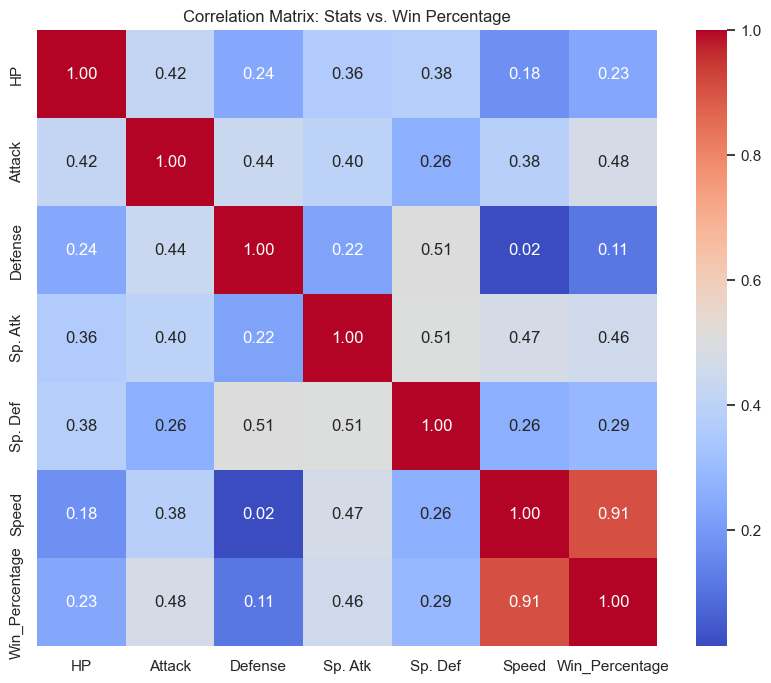

In [205]:
# Select numeric columns for correlation
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Percentage']

# Compute correlation matrix
corr_matrix = pokemon_df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Stats vs. Win Percentage')
plt.show()

#### Interpretation of the Correlation Matrix

The correlation matrix shows how each Pokémon stat relates to the win percentage:

- **Attack (0.48)**: Attack has the strongest positive correlation with win percentage among all basic stats. This suggests that higher attack power contributes significantly to winning battles.
- **Special Attack (0.46)**: Special Attack is also positively correlated, indicating that offensive abilities overall are important.
- **Speed (0.91)**: Speed shows a very strong correlation (0.91) with win percentage. This is the most influential factor. Faster Pokémon tend to win more often, likely because they can strike first.
- **Defense (0.11)** and **HP (0.23)**: These have weaker correlations, suggesting that purely defensive stats are less decisive in battle outcomes.
- **Special Defense (0.29)**: This has a moderate correlation, slightly higher than Defense.
  
**Key Insight:**
Speed, Attack, and Special Attack are the most relevant attributes driving higher win percentages. Defensive stats and HP play a smaller role in determining victory.

This analysis will guide feature selection for predictive modeling in the next steps.

#### Plot Seaborn Pairplot for Stats and Win Percentage

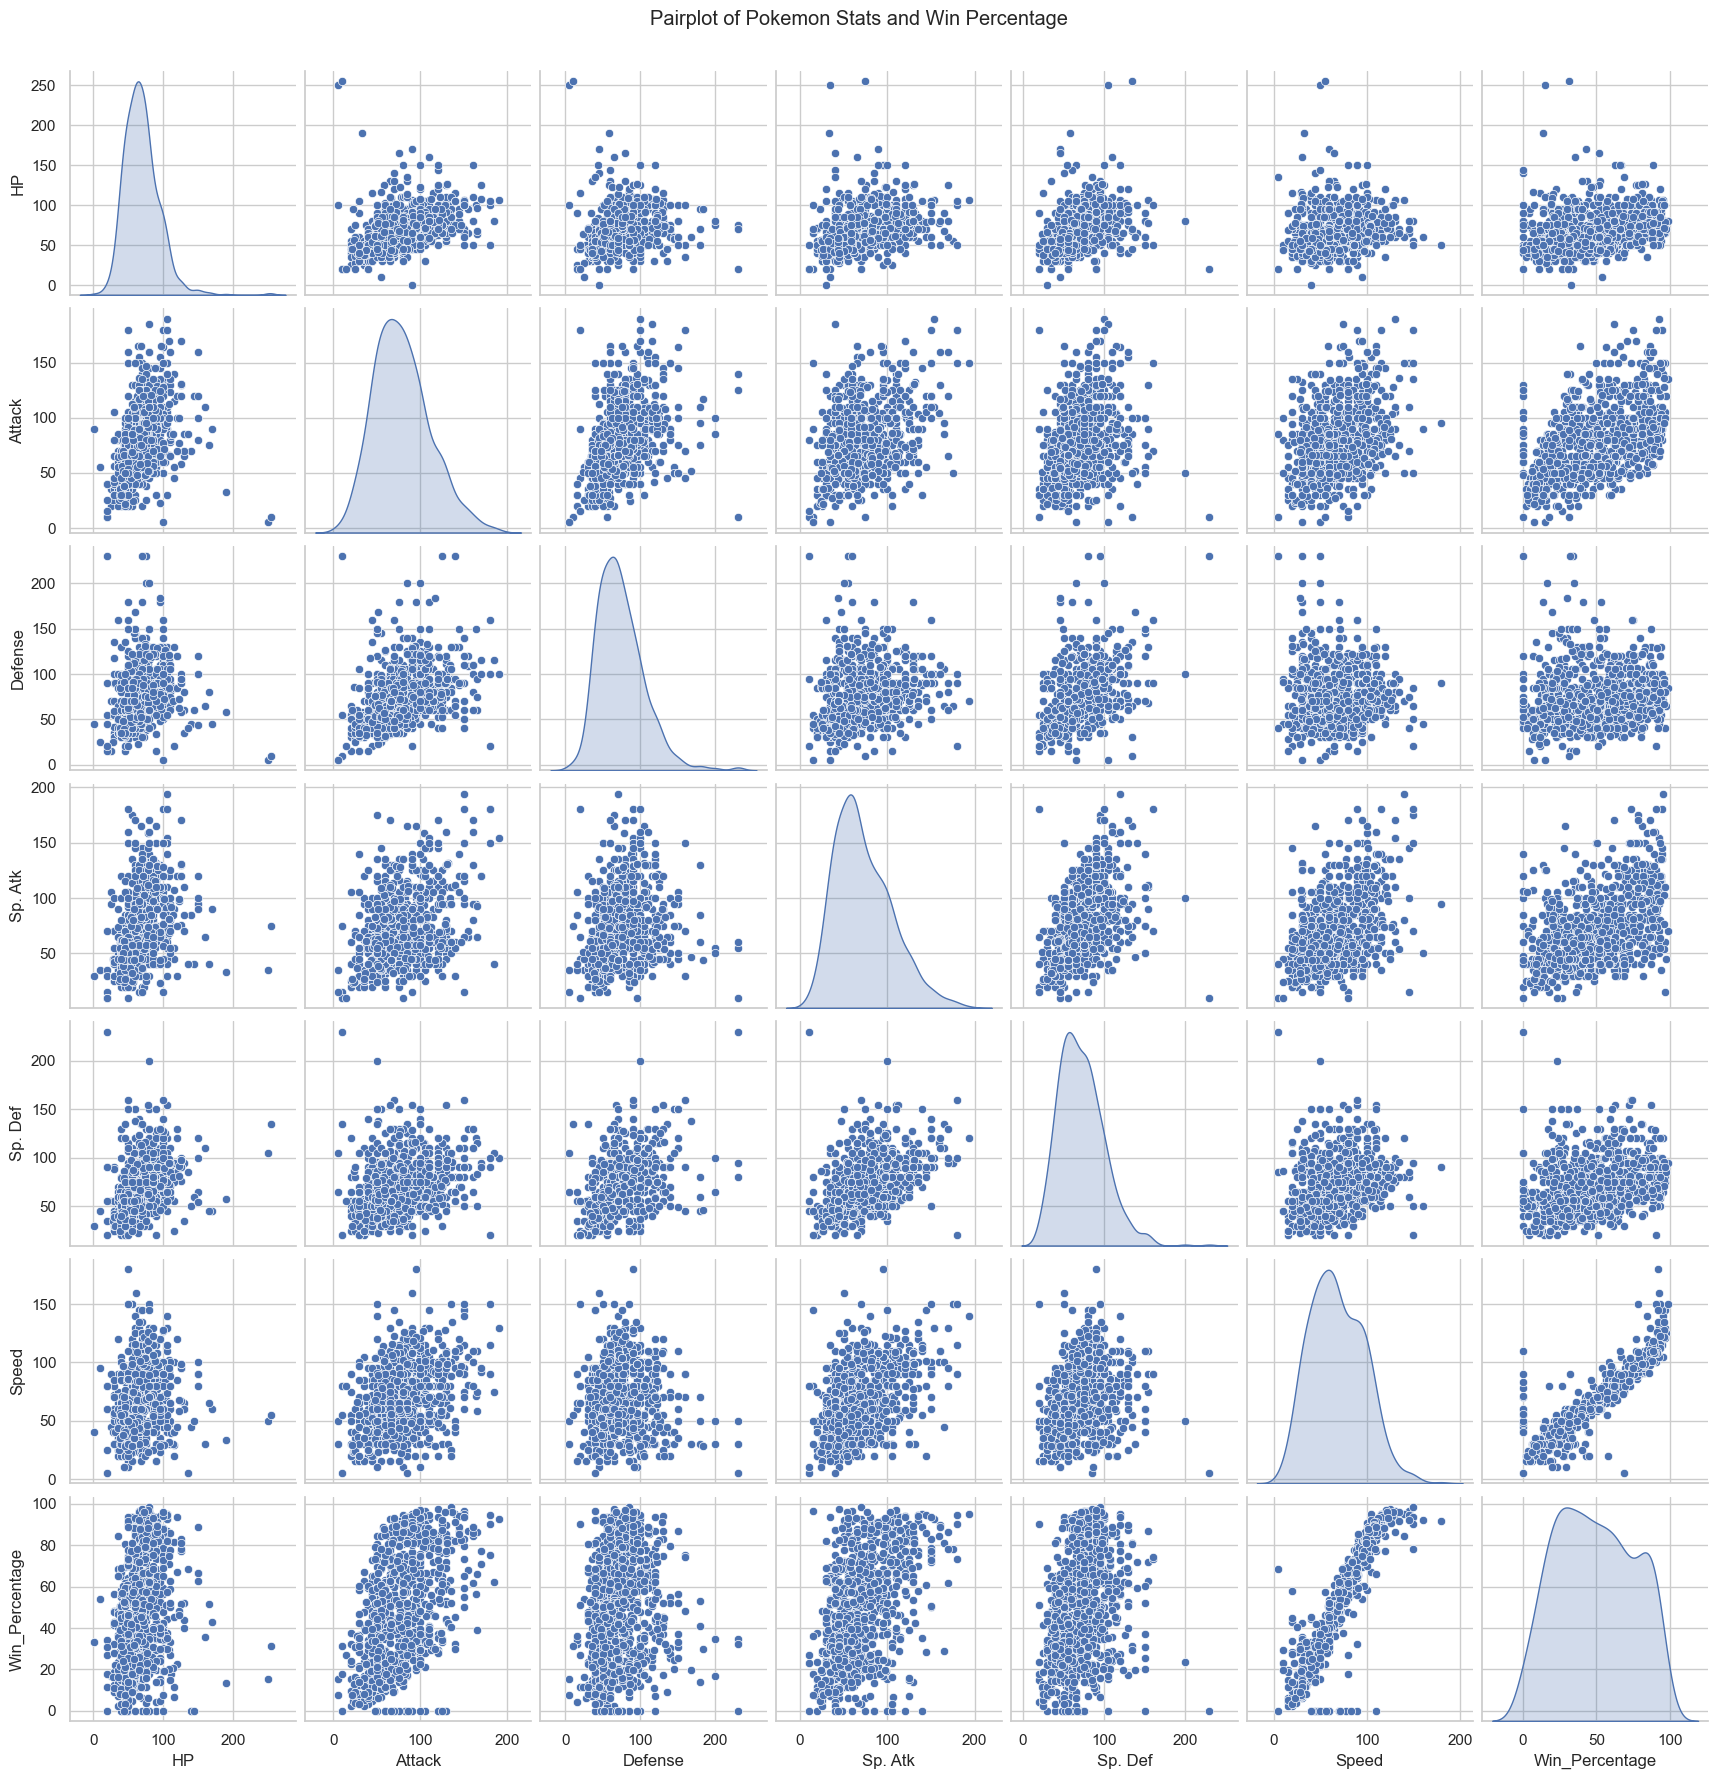

In [206]:
# Create a pairplot to visualize relationships
sns.pairplot(
    pokemon_df[numeric_cols],
    diag_kind='kde'
)
plt.suptitle('Pairplot of Pokemon Stats and Win Percentage', y=1.02)
plt.show()

#### Interpretation of the Pairplot

This pairplot visualizes the relationships between Pokémon base stats and win percentage:

**General Observations:**

- **Speed vs. Win Percentage:**
  There is a strong positive linear relationship. Pokémon with higher Speed tend to have significantly higher win percentages.

- **Attack and Special Attack vs. Win Percentage:**
  Both show a moderate positive trend. Pokémon with higher offensive stats often perform better.

- **Defense and HP vs. Win Percentage:**
  The scatterplots indicate a weaker and more dispersed relationship. Defensive stats and HP do not clearly predict higher win percentages.

- **Stat Distributions:**
  The KDE plots along the diagonal reveal:
  - Speed and Attack have more varied distributions.
  - HP and Defense are more centered with fewer extreme outliers.

**Key Insight:**
Speed appears to be the most critical factor influencing win percentage, followed by Attack and Special Attack. Defensive attributes contribute less clearly to consistent success in battles.

This understanding will help prioritize features when building predictive models.

#### Create a Styled Seaborn PairGrid

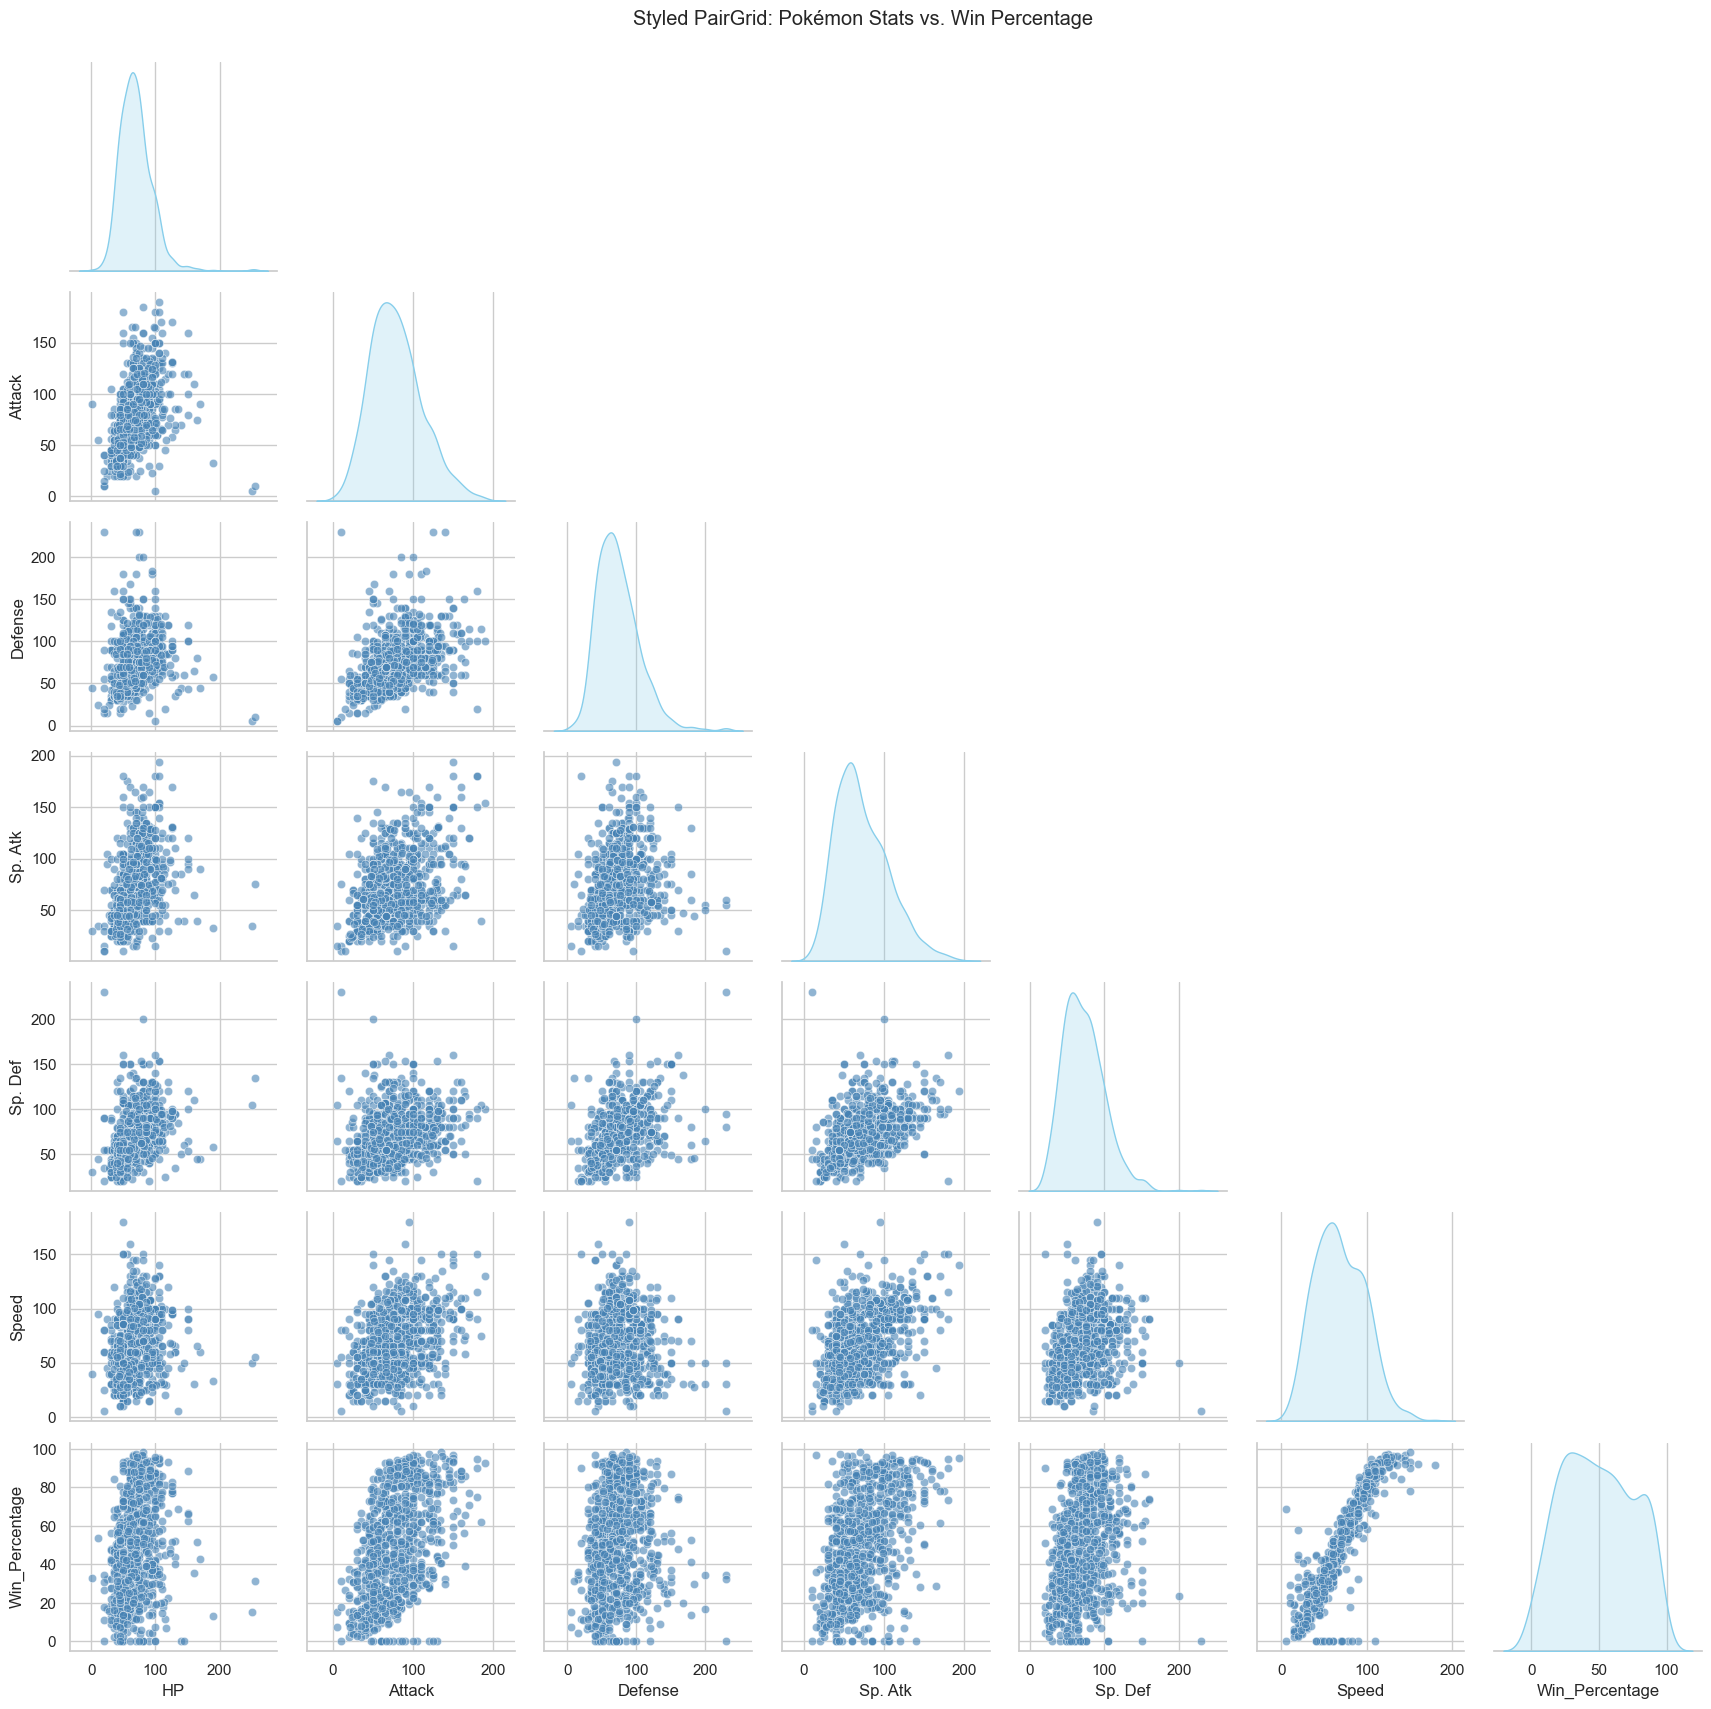

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Win_Percentage']

# Create the PairGrid
g = sns.PairGrid(
    pokemon_df[numeric_cols],
    diag_sharey=False,
    corner=True
)

# Map lower triangle scatterplots with a custom color
g.map_lower(
    sns.scatterplot,
    color="steelblue",
    alpha=0.6
)

# Map diagonal KDE plots
g.map_diag(
    sns.kdeplot,
    fill=True,
    color="skyblue"
)

# Add titles and adjust layout
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Styled PairGrid: Pokémon Stats vs. Win Percentage")

# Show the plot
plt.show()


#### Additional Insights from the Styled PairGrid

In addition to the general trends already noted, several extra details stand out in this visualization:

- **Speed vs. Attack and Speed vs. Sp. Atk:**
  The scatterplots show that many Pokémon with high Speed also tend to have higher Attack and Special Attack. This suggests that fast Pokémon often combine offensive power and speed, which could be an important factor explaining their higher win percentages.

- **Clusters of Points:**
  Some plots reveal clusters of Pokémon with similar stat combinations, especially in the mid-range of Attack and Speed. This clustering effect might indicate that many Pokémon share comparable overall strength, making small advantages in Speed decisive.

- **Win Percentage Distribution:**
  The density plot on the diagonal for Win Percentage shows a strong skew toward low and mid values. This confirms that most Pokémon have moderate or low success rates, with only a few outliers achieving very high win percentages.

- **Sp. Def vs. Win Percentage:**
  Although Sp. Def has a slightly positive correlation, the scatterplot shows a wide spread without a clear linear trend, suggesting it is not a reliable predictor on its own.

**Summary:**
This PairGrid provides a nuanced view of how combinations of Speed, Attack, and Special Attack contribute to winning, while defensive stats play a more limited role. These observations can guide feature selection and modeling strategies.

#### Analyze Top 10 Pokemon by Win Percentage

In [208]:
# Select relevant columns
cols = [
    '#', 'Name', 'Total_Battles', 'Wins', 'Win_Percentage',
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'
]
top_10 = pokemon_df.sort_values(by='Win_Percentage', ascending=False).head(10)
# Create styled DataFrame
styled_table = top_10[cols].style \
    .background_gradient(subset=['Win_Percentage'], cmap='Blues') \
    .format({'Win_Percentage': '{:.2f}%'}) \
    .bar(subset=['Wins'], color='lightblue') \
    .bar(subset=['Speed'], color='skyblue') \
    .set_caption('Top 10 Pokémon by Win Percentage')

# Display the styled table
styled_table

,#,Name,Total_Battles,Wins,Win_Percentage,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
154,155,Mega Aerodactyl,129.000000,127.000000,98.45%,80,135,85,70,95,150
512,513,Weavile,119.000000,116.000000,97.48%,70,120,65,45,85,125
703,704,Tornadus Therian Forme,125.000000,121.000000,96.80%,79,100,80,110,90,121
19,20,Mega Beedrill,119.000000,115.000000,96.64%,65,150,40,15,80,145
153,154,Aerodactyl,141.000000,136.000000,96.45%,80,105,65,60,75,130
476,477,Mega Lopunny,129.000000,124.000000,96.12%,65,136,94,54,96,135
726,727,Greninja,127.000000,122.000000,96.06%,72,95,67,103,71,122
716,717,Meloetta Pirouette Forme,123.000000,118.000000,95.93%,100,128,90,77,77,128
164,165,Mega Mewtwo Y,125.000000,119.000000,95.20%,106,150,70,194,120,140
349,350,Mega Sharpedo,120.000000,114.000000,95.00%,70,140,70,110,65,105


#### Interpretation of the Top 10 Pokémon by Win Percentage

**Overview:**

The top 10 Pokémon with the highest win percentages all have extremely high values, ranging from ~95% to ~98%. These Pokémon are consistently dominant in battles.

**Key Characteristics:**

- **Speed:**
  All top performers have very high Speed stats (105–150). For example, Mega Aerodactyl (Speed 150) and Mega Beedrill (Speed 145) rank among the fastest.

- **Attack:**
  Most have high Attack values (above 120). Mega Beedrill and Mega Mewtwo Y have Attack stats of 150.

- **Special Attack:**
  Some Pokémon balance physical and special offense. Mega Mewtwo Y stands out with a Special Attack of 194, the highest in this list.

- **Defense and HP:**
  Generally moderate, indicating that speed and offensive power are more decisive than defensive durability.

**Insights:**

- Pokémon with a combination of very high Speed and Attack or Special Attack tend to dominate battles.
- The correlation between Speed and Win Percentage observed in the earlier analyses is strongly confirmed by this ranking.
- Defensive stats and HP are not as prominent among the top performers.

This analysis reinforces the idea that offensive power and speed are the main drivers of battle success.

#### Visualize Top 10 Win Percentages

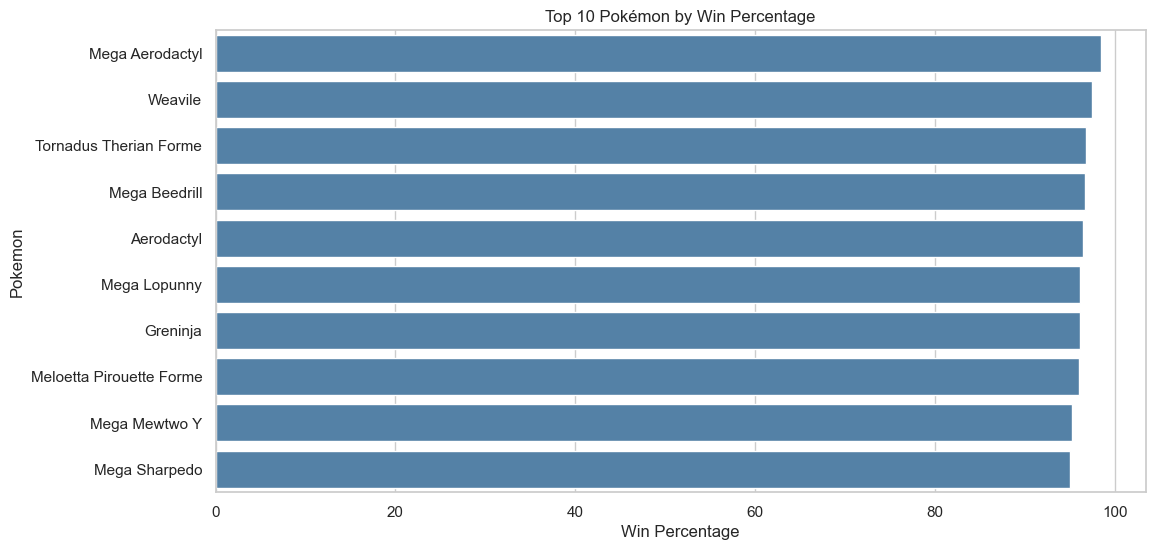

In [209]:
# Set a clean style
sns.set(style="whitegrid")

# Create a larger figure
plt.figure(figsize=(12, 6))

# Create the barplot with a single blue color
sns.barplot(
    x='Win_Percentage',
    y='Name',
    data=top_10,
    color='steelblue'
)

# Set labels and title
plt.xlabel('Win Percentage')
plt.ylabel('Pokemon')
plt.title('Top 10 Pokémon by Win Percentage')

# Display the plot
plt.show()

#### Interpretation of the Top 10 Pokémon Win Percentage Barplot

This horizontal barplot shows the win percentage of the top 10 Pokémon:

**Observations:**
- All top Pokémon have win percentages above 95%, indicating extremely strong performance in battles.
- **Mega Aerodactyl** is the top performer, with a win rate close to 98.5%.
- There is very little variation among these Pokémon; their bars are almost the same length, reflecting consistently high success rates.
- Many of the top performers are **Mega Evolutions or Legendary forms**, which typically have enhanced stats.
- The visual emphasizes how dominant this small group is compared to the average Pokémon.

**Conclusion:**
This chart highlights that a select few Pokémon, particularly Mega Evolutions, dominate battles with nearly perfect win percentages. Their consistently superior performance sets them apart from the rest of the dataset.

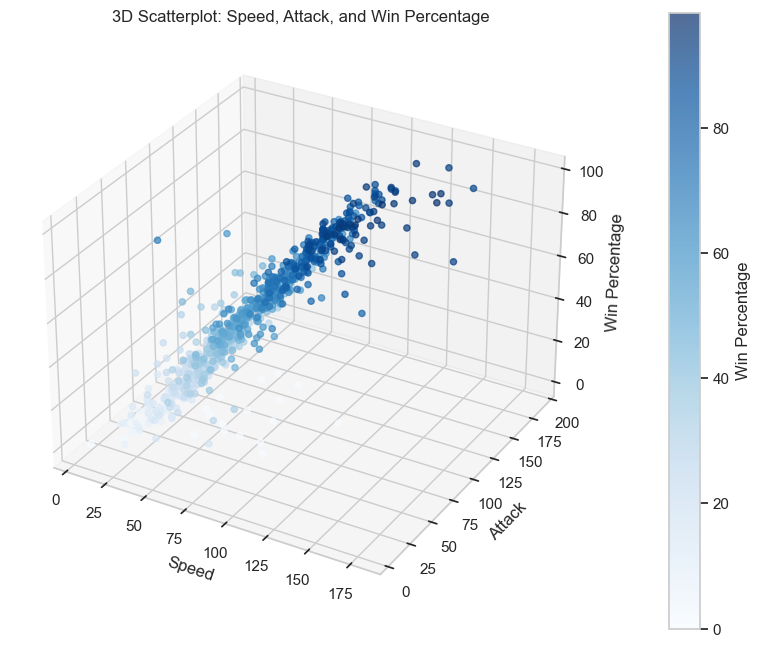

In [210]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot
scatter = ax.scatter(
    pokemon_df['Speed'],
    pokemon_df['Attack'],
    pokemon_df['Win_Percentage'],
    c=pokemon_df['Win_Percentage'],
    cmap='Blues',
    alpha=0.7
)

# Set labels
ax.set_xlabel('Speed')
ax.set_ylabel('Attack')
ax.set_zlabel('Win Percentage')
ax.set_title('3D Scatterplot: Speed, Attack, and Win Percentage')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Win Percentage')

# Show the plot
plt.show()

#### Interpretation of the 3D Scatterplot

This 3D scatterplot shows the relationship between Speed, Attack, and Win Percentage:

**Observations:**

- **Positive Gradient:**
  There is a clear upward trend: Pokémon with higher Speed and higher Attack also tend to have higher Win Percentages. The gradient of blue shades confirms that the most successful Pokémon are concentrated in the upper-right corner.

- **Speed as a Key Driver:**
  Along the Speed axis, there is a visible increase in Win Percentage, supporting earlier analyses that Speed is the most decisive stat.

- **Distribution:**
  The majority of Pokémon are clustered in the lower-mid ranges of Speed and Attack, with moderate Win Percentages. Only a few points are located in the extreme high values.

- **No Clear Clusters:**
  While there is a general trend, no distinct sub-groups (clusters) are clearly separated. This suggests that Speed and Attack contribute in a continuous way rather than forming discrete classes.

**Conclusion:**
The 3D visualization reinforces the conclusion that combinations of high Speed and Attack drive higher Win Percentages. This insight is useful for feature selection and predictive modeling.

### 3. Machine Learning

#### Feature Selection Rationale (Extended Version)

In this modeling approach, two sets of input variables were considered:

1. **Numeric Base Stats Only:**
   - HP
   - Attack
   - Defense
   - Sp. Atk
   - Sp. Def
   - Speed

   These are the core attributes that determine the Pokémon's combat abilities.

2. **Extended Features:**
   - `Type 1`: A categorical variable representing the Pokémon's primary type (e.g., Fire, Water, Electric).
   - `Legendary`: A binary variable indicating whether the Pokémon is a legendary species.
   
Including `Type 1` and `Legendary` is justified because:
- Some types may have systemic advantages in battles.
- Legendary Pokémon often have higher base stats and unique abilities.

**Approach:**
- We will first train models using only numeric features to establish a baseline.
- Then we will train models using numeric features combined with encoded categorical features.
- Finally, we will compare the performance (Mean Absolute Error) to see if the extended features improve predictive accuracy.

#### Define Numeric Features Only

In [211]:
# Select numeric base stats only (no categorical features)
X_numeric = pokemon_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
y = pokemon_df['Win_Percentage']

# Display to check
print(X_numeric.head())

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0  45      49       49       65       65     45
1  60      62       63       80       80     60
2  80      82       83      100      100     80
3  80     100      123      122      120     80
4  39      52       43       60       50     65


#### Train/Test Split

In [212]:
# Split into train and test sets (80/20)
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)

print("Train set size:", X_train_num.shape)
print("Test set size:", X_test_num.shape)

Train set size: (640, 6)
Test set size: (160, 6)


#### Linear Regression

In [234]:
# Standardisation
scaler_num = StandardScaler()
X_train_scaled = scaler_num.fit_transform(X_train_num)
X_test_scaled = scaler_num.transform(X_test_num)

# Entraînement
lr_model_num = LinearRegression()
lr_model_num.fit(X_train_scaled, y_train_num)

# Prédiction
y_pred_lr = lr_model_num.predict(X_test_scaled)
mae_lr = mean_absolute_error(y_test_num, y_pred_lr)
r2_lr = r2_score(y_test_num, y_pred_lr)

# CV
mae_cv_lr = -cross_val_score(lr_model_num, X_train_scaled, y_train_num, cv=5, scoring=mae_scorer)
r2_cv_lr = cross_val_score(lr_model_num, X_train_scaled, y_train_num, cv=5, scoring=r2_scorer)

print(f"Linear Regression MAE (Test): {mae_lr:.2f}")
print(f"Linear Regression R² (Test): {r2_lr:.2f}")
print(f"Linear Regression - MAE CV: {mae_cv_lr.mean():.2f} ± {mae_cv_lr.std():.2f}")
print(f"Linear Regression - R² CV: {r2_cv_lr.mean():.2f} ± {r2_cv_lr.std():.2f}")

Linear Regression MAE (Test): 6.49
Linear Regression R² (Test): 0.83
Linear Regression - MAE CV: 6.76 ± 0.30
Linear Regression - R² CV: 0.83 ± 0.04


#### Random Forest Regressor

In [235]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_num, y_train_num)
y_pred_rf = rf_model.predict(X_test_num)

mae_rf = mean_absolute_error(y_test_num, y_pred_rf)
r2_rf = r2_score(y_test_num, y_pred_rf)

mae_cv_rf = -cross_val_score(rf_model, X_train_num, y_train_num, cv=5, scoring=mae_scorer)
r2_cv_rf = cross_val_score(rf_model, X_train_num, y_train_num, cv=5, scoring=r2_scorer)

print(f"Random Forest MAE (Test): {mae_rf:.2f}")
print(f"Random Forest R² (Test): {r2_rf:.2f}")
print(f"Random Forest - MAE CV: {mae_cv_rf.mean():.2f} ± {mae_cv_rf.std():.2f}")
print(f"Random Forest - R² CV: {r2_cv_rf.mean():.2f} ± {r2_cv_rf.std():.2f}")

Random Forest MAE (Test): 5.75
Random Forest R² (Test): 0.86
Random Forest - MAE CV: 5.67 ± 0.28
Random Forest - R² CV: 0.87 ± 0.03


#### XGBoost Regressor

In [237]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_num, y_train_num)
y_pred_xgb = xgb_model.predict(X_test_num)

mae_xgb = mean_absolute_error(y_test_num, y_pred_xgb)
r2_xgb = r2_score(y_test_num, y_pred_xgb)

mae_cv_xgb = -cross_val_score(xgb_model, X_train_num, y_train_num, cv=5, scoring=mae_scorer)
r2_cv_xgb = cross_val_score(xgb_model, X_train_num, y_train_num, cv=5, scoring=r2_scorer)

print(f"XGBoost MAE (Test): {mae_xgb:.2f}")
print(f"XGBoost R² (Test): {r2_xgb:.2f}")
print(f"XGBoost - MAE CV: {mae_cv_xgb.mean():.2f} ± {mae_cv_xgb.std():.2f}")
print(f"XGBoost - R² CV: {r2_cv_xgb.mean():.2f} ± {r2_cv_xgb.std():.2f}")

XGBoost MAE (Test): 6.58
XGBoost R² (Test): 0.82
XGBoost - MAE CV: 6.57 ± 0.32
XGBoost - R² CV: 0.83 ± 0.04


#### Model Evaluation Results (Numeric Features Only)

#### Linear Regression
- **Test MAE:** 6.49
- **Test R²:** 0.83
- **Cross-Validation MAE:** 6.76 ± 0.30
- **Cross-Validation R²:** 0.83 ± 0.04

#### Random Forest
- **Test MAE:** 5.75
- **Test R²:** 0.86
- **Cross-Validation MAE:** 5.67 ± 0.28
- **Cross-Validation R²:** 0.87 ± 0.03

#### XGBoost
- **Test MAE:** 6.58
- **Test R²:** 0.82
- **Cross-Validation MAE:** 6.57 ± 0.32
- **Cross-Validation R²:** 0.83 ± 0.04

**Interpretation:**

These results show that Random Forest consistently outperformed Linear Regression and XGBoost across both the hold-out test set and cross-validation:

- **Random Forest** achieved the lowest Mean Absolute Error (MAE) both on the test set (5.75) and in cross-validation (5.67 ± 0.28). This indicates that the model is able to capture non-linear relationships between numeric Pokémon stats and win rate effectively.
- **Linear Regression** and **XGBoost** performed similarly, with MAE values around 6.5–6.7, suggesting that their predictive accuracy was slightly lower than Random Forest.
- The R² scores confirm this pattern: Random Forest explained approximately 86–87% of the variance in win rate, compared to ~82–83% for the other models.

**Conclusion:**

Based on both test set and cross-validation metrics, Random Forest provides the most accurate and robust predictions when using numeric features only.

#### Encode Categorical Features (Type 1 and Legendary)

In [218]:
# One-Hot Encode 'Type 1' with integer values (0/1)
type1_dummies = pd.get_dummies(pokemon_df['Type 1'], prefix='Type1').astype(int)

# Encode 'Legendary' as binary
pokemon_df['Legendary_Encoded'] = pokemon_df['Legendary'].astype(int)

# Combine all features again
feature_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Legendary_Encoded']
X_extended = pd.concat([pokemon_df[feature_cols], type1_dummies], axis=1)

# Check the first rows to confirm encoding
print(X_extended.head())

   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary_Encoded  Type1_Bug  \
0  45      49       49       65       65     45                  0          0   
1  60      62       63       80       80     60                  0          0   
2  80      82       83      100      100     80                  0          0   
3  80     100      123      122      120     80                  0          0   
4  39      52       43       60       50     65                  0          0   

   Type1_Dark  Type1_Dragon  ...  Type1_Ghost  Type1_Grass  Type1_Ground  \
0           0             0  ...            0            1             0   
1           0             0  ...            0            1             0   
2           0             0  ...            0            1             0   
3           0             0  ...            0            1             0   
4           0             0  ...            0            0             0   

   Type1_Ice  Type1_Normal  Type1_Poison  Type1_Psychic 

#### Feature Encoding Overview

After encoding categorical variables, the dataset now includes:

- **Original numeric features:** HP, Attack, Defense, Sp. Atk, Sp. Def, Speed.
- **Legendary_Encoded:** A binary variable indicating whether the Pokémon is legendary (1) or not (0).
- **Type1_XXX columns:** One-hot encoded binary flags for each primary Pokémon type (e.g., Grass, Fire, Water, etc.).

**Example interpretation of the first rows:**

- Rows 0–3 have `Type1_Grass = 1`, indicating that these Pokémon are of the Grass type.
- `Legendary_Encoded = 0` shows that none of them are legendary.
- All other type columns are set to 0 for each Pokémon, except for their actual primary type.

This encoding allows machine learning models to learn from categorical information without introducing multicollinearity.

#### Train/Test Split (extended features)

In [219]:
# Split into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_extended, y, test_size=0.2, random_state=42
)

# Check the shapes to confirm
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (640, 25)
Test set size: (160, 25)


#### Linear Regression with Extended Features

In [245]:
scaler_ext = StandardScaler()
X_train_scaled_ext = scaler_ext.fit_transform(X_train)
X_test_scaled_ext = scaler_ext.transform(X_test); lr_ext = LinearRegression()
lr_ext.fit(X_train_scaled_ext, y_train)

y_pred_lr_ext = lr_ext.predict(X_test_scaled_ext)
mae_lr_ext = mean_absolute_error(y_test, y_pred_lr_ext)
r2_lr_ext = r2_score(y_test, y_pred_lr_ext)

mae_cv_lr_ext = -cross_val_score(lr_ext, X_train_scaled_ext, y_train, cv=5, scoring=mae_scorer)
r2_cv_lr_ext = cross_val_score(lr_ext, X_train_scaled_ext, y_train, cv=5, scoring=r2_scorer)

print(f"Linear Regression (Extended) MAE (Test): {mae_lr_ext:.2f}")
print(f"Linear Regression (Extended) R² (Test): {r2_lr_ext:.2f}")
print(f"Linear Regression (Extended) - MAE CV: {mae_cv_lr_ext.mean():.2f} ± {mae_cv_lr_ext.std():.2f}")
print(f"Linear Regression (Extended) - R² CV: {r2_cv_lr_ext.mean():.2f} ± {r2_cv_lr_ext.std():.2f}")

Linear Regression (Extended) MAE (Test): 6.13
Linear Regression (Extended) R² (Test): 0.84
Linear Regression (Extended) - MAE CV: 6.72 ± 0.36
Linear Regression (Extended) - R² CV: 0.83 ± 0.04


#### Random Forest Regressor with Extended Features

In [244]:
rf_ext = RandomForestRegressor(random_state=42)
rf_ext.fit(X_train, y_train)
y_pred_rf_ext = rf_ext.predict(X_test)

mae_rf_ext = mean_absolute_error(y_test, y_pred_rf_ext)
r2_rf_ext = r2_score(y_test, y_pred_rf_ext)

mae_cv_rf_ext = -cross_val_score(rf_ext, X_train, y_train, cv=5, scoring=mae_scorer)
r2_cv_rf_ext = cross_val_score(rf_ext, X_train, y_train, cv=5, scoring=r2_scorer)

print(f"Random Forest (Extended) MAE (Test): {mae_rf_ext:.2f}")
print(f"Random Forest (Extended) R² (Test): {r2_rf_ext:.2f}")
print(f"Random Forest (Extended) - MAE CV: {mae_cv_rf_ext.mean():.2f} ± {mae_cv_rf_ext.std():.2f}")
print(f"Random Forest (Extended) - R² CV: {r2_cv_rf_ext.mean():.2f} ± {r2_cv_rf_ext.std():.2f}")

Random Forest (Extended) MAE (Test): 5.74
Random Forest (Extended) R² (Test): 0.86
Random Forest (Extended) - MAE CV: 5.65 ± 0.29
Random Forest (Extended) - R² CV: 0.87 ± 0.03


#### XGBoost Regressor with Extended Features

In [243]:
xgb_ext = XGBRegressor(random_state=42)
xgb_ext.fit(X_train, y_train)
y_pred_xgb_ext = xgb_ext.predict(X_test)

mae_xgb_ext = mean_absolute_error(y_test, y_pred_xgb_ext)
r2_xgb_ext = r2_score(y_test, y_pred_xgb_ext)

mae_cv_xgb_ext = -cross_val_score(xgb_ext, X_train, y_train, cv=5, scoring=mae_scorer)
r2_cv_xgb_ext = cross_val_score(xgb_ext, X_train, y_train, cv=5, scoring=r2_scorer)

print(f"XGBoost (Extended) MAE (Test): {mae_xgb_ext:.2f}")
print(f"XGBoost (Extended) R² (Test): {r2_xgb_ext:.2f}")
print(f"XGBoost (Extended) - MAE CV: {mae_cv_xgb_ext.mean():.2f} ± {mae_cv_xgb_ext.std():.2f}")
print(f"XGBoost (Extended) - R² CV: {r2_cv_xgb_ext.mean():.2f} ± {r2_cv_xgb_ext.std():.2f}")

XGBoost (Extended) MAE (Test): 6.33
XGBoost (Extended) R² (Test): 0.84
XGBoost (Extended) - MAE CV: 6.27 ± 0.42
XGBoost (Extended) - R² CV: 0.83 ± 0.04


### Prepare Data for Visualization

In [232]:
# Create a DataFrame summarizing the MAE results
mae_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE_Numeric': [6.49, 5.75, 6.58],
    'MAE_Extended': [6.13, 5.74, 6.33]
})

print(mae_data)

               Model  MAE_Numeric  MAE_Extended
0  Linear Regression         6.49          6.13
1      Random Forest         5.75          5.74
2            XGBoost         6.58          6.33


#### Model Evaluation Results (Extended Features)

#### Linear Regression
- **Test MAE:** 6.13
- **Test R²:** 0.84
- **Cross-Validation MAE:** 6.72 ± 0.36
- **Cross-Validation R²:** 0.83 ± 0.04

#### Random Forest
- **Test MAE:** 5.74
- **Test R²:** 0.86
- **Cross-Validation MAE:** 5.65 ± 0.29
- **Cross-Validation R²:** 0.87 ± 0.03

#### XGBoost
- **Test MAE:** 6.33
- **Test R²:** 0.84
- **Cross-Validation MAE:** 6.27 ± 0.42
- **Cross-Validation R²:** 0.83 ± 0.04

**Interpretation:**

When including extended features (encoded Pokémon types and Legendary status), the models showed small improvements or maintained similar performance compared to numeric features only:

- **Linear Regression** achieved a slight reduction in Test MAE (from ~6.49 to ~6.13) and maintained a strong R² around 0.83–0.84. This indicates that the linear model can benefit modestly from the additional categorical information.
- **Random Forest** continued to deliver the most accurate predictions, with the lowest Test MAE (5.74) and the highest R² (0.86–0.87). This confirms that Random Forest leverages the richer feature set effectively to improve accuracy.
- **XGBoost** also improved slightly in MAE compared to numeric-only features, though it still did not outperform Random Forest.

**Conclusion:**

Adding encoded categorical features resulted in minor but consistent improvements in model performance. Random Forest remained the most accurate and robust model overall, achieving the lowest prediction error and highest variance explained.

### Final Comparison: Numeric Features vs. Extended Features

**Overview:**

The project evaluated three regression models (Linear Regression, Random Forest, XGBoost) to predict Pokémon win percentage using two different feature sets:

- **Numeric Features Only:** Base stats such as HP, Attack, Defense, Sp. Atk, Sp. Def, and Speed.
- **Extended Features:** Numeric stats plus encoded categorical variables (Type 1, Type 2, Legendary status).

**Performance Summary:**

| Model             | MAE (Numeric) | R² (Numeric) | MAE (Extended) | R² (Extended) |
|-------------------|---------------|--------------|----------------|---------------|
| Linear Regression | ~6.49 (Test)  | ~0.83        | ~6.13 (Test)   | ~0.84         |
| Random Forest     | ~5.75 (Test)  | ~0.86        | ~5.74 (Test)   | ~0.86         |
| XGBoost           | ~6.58 (Test)  | ~0.82        | ~6.33 (Test)   | ~0.84         |

**Interpretation:**

- **Linear Regression** showed a small improvement when including categorical features, reducing MAE from ~6.49 to ~6.13 and slightly increasing R².
- **Random Forest** remained the most accurate model overall, achieving the lowest MAE in both configurations (~5.75), with almost no difference between Numeric and Extended features. This suggests Random Forest could already capture most of the predictive power from numeric stats alone.
- **XGBoost** also improved slightly with Extended features, reducing MAE by about 0.25 points and increasing R² from ~0.82 to ~0.84.

**Conclusion:**

Adding encoded categorical variables (types and Legendary status) led to minor but consistent improvements in Linear Regression and XGBoost, while Random Forest maintained its strong performance across both feature sets. This indicates that numeric stats are already highly informative for predicting Pokémon win rates, but including additional categorical features can still enhance prediction quality, especially in simpler models.